## 2 (30 puntos) Funciones multivariable
1. Vector Gradiente: Para cada una de las siguientes funciones multivariable: grafique su superficie, calcule el vector gradiente manualmente, evaluelo y grafique el vector unitario o de largo conveniente para su visualización, en la dirección del gradiente para los dos puntos especificados (en la misma figura de la superficie). Finalmente calcule la magnitud de tal vector gradiente en cada punto.

    a) (5 puntos) $f\left(x,y\right)=\sqrt{x^{2}+y^{2}}$, evaluación del gradiente en los puntos $P_{0}=\left(5.2,6.4\right)$ y $P_{1}=\left(5.2,2.3\right)$.

    El vector gradiente corresponde a:

    $\frac{\delta f}{\delta x}\sqrt{x^{2}+y^{2}} \rightarrow{ (x^{2}+y^{2})^{\frac{1}{2}}=\frac{(x^{2}+y^{2})^{\frac{1}{2}}}{\cancel{2}}\cdot\cancel{2}x=\frac{x}{(x^{2}+y^{2})^{\frac{1}{2}}}=\mathbf{\frac{x}{\sqrt{x^{2}+y^{2}}}}}$

    $\frac{\delta f}{\delta y}\sqrt{x^{2}+y^{2}} \rightarrow{ (x^{2}+y^{2})^{\frac{1}{2}}=\frac{(x^{2}+y^{2})^{\frac{1}{2}}}{\cancel{2}}\cdot\cancel{2}y=\frac{y}{(x^{2}+y^{2})^{\frac{1}{2}}}=\mathbf{\frac{y}{\sqrt{x^{2}+y^{2}}}}}$

    $\mathbf{\nabla f(x,y)=\frac{x}{\sqrt{x^{2}+y^{2}}}\hat{i}+\frac{y}{\sqrt{x^{2}+y^{2}}}\hat{j}}$


Gráfica de la superficie de la función:

In [1]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import style
%matplotlib widget
style.use('default')

In [2]:
#Función multivariable original
def funcion_z(X,Y):
    #return torch.sqrt(torch.tensor([X**2 + Y**2]))
    return torch.sqrt(X**2 + Y**2)

#Calculo del Vector Gradiente (Derivadas parciales)
def dx(X,Y):
    return X / torch.sqrt(X**2 + Y**2)

def dy(X,Y):
    return Y / torch.sqrt(X**2 + Y**2)

def vector_gradiente(X,Y):
    return [dx(X,Y),dy(X,Y),0]


P0=torch.tensor([5.2,6.4], dtype = torch.float)
P1=torch.tensor([5.2,2.3], dtype = torch.float)

vector_p0=torch.tensor([vector_gradiente(P0[0],P0[1])], dtype = torch.float)
vector_p1=torch.tensor([vector_gradiente(P1[0],P1[1])], dtype = torch.float)

print("El valor del vector gradiente para el punto P0=(5.2, 6.4) es: ", vector_p0)
print("El valor del vector gradiente para el punto P1=(5.2, 2.3) es: ", vector_p1)

El valor del vector gradiente para el punto P0=(5.2, 6.4) es:  tensor([[0.6306, 0.7761, 0.0000]])
El valor del vector gradiente para el punto P1=(5.2, 2.3) es:  tensor([[0.9145, 0.4045, 0.0000]])


C:\Users\jcord\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


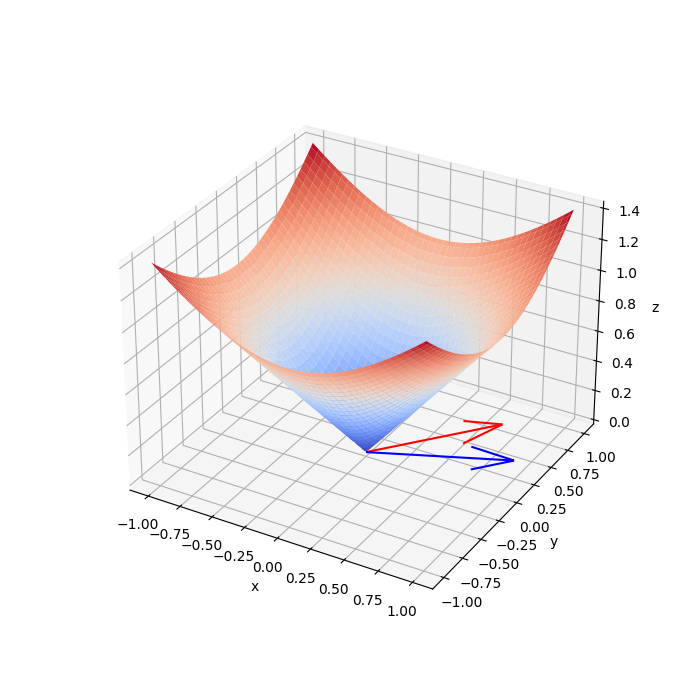

In [3]:
#Inicia el plot
N=256
arrange=[-1,1]

x_values=torch.linspace(arrange[0],arrange[1],steps=N)
y_values=torch.linspace(arrange[0],arrange[1],steps=N)

X, Y = torch.meshgrid(x_values,y_values)
Z = funcion_z(X,Y)

fig=plt.figure(figsize=(7,7))

ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

origin=[0,0,0]
ax.quiver(origin[0], origin[1], origin[2], vector_p0[:,0],vector_p0[:,1],vector_p0[:,2], color='r')
ax.quiver(origin[0], origin[1], origin[2], vector_p1[:,0],vector_p1[:,1],vector_p1[:,2], color='b')

ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=10,antialiased=True)

In [4]:
#Magnitud de los vectores:
print("La magnitud del vector P0 es: ", torch.linalg.vector_norm(vector_p0))
print("La magnitud del vector P1 es: ", torch.linalg.vector_norm(vector_p1))

La magnitud del vector P0 es:  tensor(1.)
La magnitud del vector P1 es:  tensor(1.)


b) (5 puntos) $z=f\left(x,y\right)=3x^{2}+2y^{4}$, evaluación del gradiente en los puntos $P_{0}=\left(0,0\right)$ y $P_{1}=\left(7.4,-6.3\right)$.
   
El vector gradiente corresponde a:

   $\frac{\delta f}{\delta x}3x^{2}+2y^{4} \rightarrow{3x^{2}=\mathbf{6x}}$

   $\frac{\delta f}{\delta y}3x^{2}+2y^{4} \rightarrow{2y^{4}=\mathbf{8y^{3}}}$

   $\mathbf{\nabla f(x,y)=6x\hat{i}+8y^{3}\hat{j}}$

In [5]:
#Función multivariable original
def funcion_z(X, Y):
    return (3*X**2) + (2*Y**4)

#Calculo del Vector Gradiente (Derivadas parciales)
def dx(X,Y):
    return 6*X

def dy(X,Y):
    return 8*Y**3

def vector_gradiente(X,Y):
    return [dx(X,Y),dy(X,Y),0]


P0=torch.tensor([0,0], dtype = torch.float)
P1=torch.tensor([7.4,-6.3], dtype = torch.float)

vector_p0=torch.tensor([vector_gradiente(P0[0],P0[1])], dtype = torch.float)
vector_p1=torch.tensor([vector_gradiente(P1[0],P1[1])], dtype = torch.float)

print("El valor del vector gradiente para el punto P0=(0, 0) es: ", vector_p0)
print("El valor del vector gradiente para el punto P1=(7.4, -6.3) es: ", vector_p1)

El valor del vector gradiente para el punto P0=(0, 0) es:  tensor([[0., 0., 0.]])
El valor del vector gradiente para el punto P1=(7.4, -6.3) es:  tensor([[   44.4000, -2000.3762,     0.0000]])


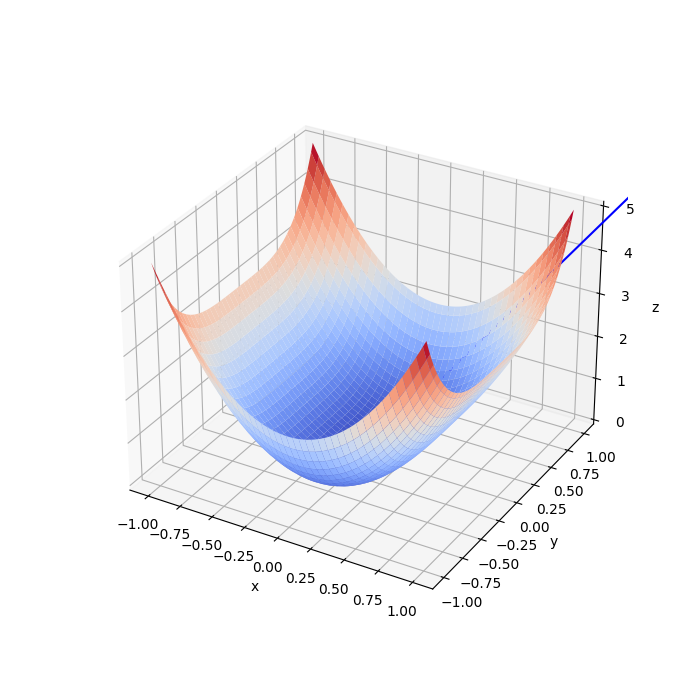

In [6]:
#Inicia el plot
N=256
arrange=[-1,1]

x_values=torch.linspace(arrange[0],arrange[1],steps=N)
y_values=torch.linspace(arrange[0],arrange[1],steps=N)

X, Y = torch.meshgrid(x_values,y_values)
Z = funcion_z(X,Y)

fig=plt.figure(figsize=(7,7))

ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

origin=[0,0,0]
ax.quiver(origin[0], origin[1], origin[2], vector_p0[:,0],vector_p0[:,1],vector_p0[:,2], color='r')
ax.quiver(origin[0], origin[1], origin[2], vector_p1[:,0],vector_p1[:,1],vector_p1[:,2], color='b')

ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=10,antialiased=True)

In [7]:
#Magnitud de los vectores:
print("La magnitud del vector P0 es: ", torch.linalg.vector_norm(vector_p0))
print("La magnitud del vector P1 es: ", torch.linalg.vector_norm(vector_p1))

La magnitud del vector P0 es:  tensor(0.)
La magnitud del vector P1 es:  tensor(2000.8689)


c) (5 puntos) $z=f\left(x,y\right)=4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1$, evaluación del gradiente en los puntos $P_{0}=\left(2,1\right)$ y $P_{1}=\left(5,7\right)$.

El vector gradiente corresponde a:

   $\frac{\delta f}{\delta x}4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1 \rightarrow{8x+2+2e^{2x}+0+0+0=8x+2+2e^{2x}=\mathbf{2(4x+e^{2x}+1)}}$

   $\frac{\delta f}{\delta y}4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1 \rightarrow{0+0+0+10y+3e^{3y}+0=\mathbf{10y+3e^{3y}}}$

   $\nabla f(x,y)=2(4x+e^{2x}+1)\hat{i}+10y+3e^{3y}\hat{j}$

Gráfica de la superficie de la función:

In [8]:
#Función multivariable original
def funcion_z(X, Y):
    return (4*X**2) + (2*X) + (torch.e**(2*X)) + (5*Y**2) + (torch.e**(3*Y)) + 1

#Calculo del Vector Gradiente (Derivadas parciales)
def dx(X,Y):
    return 2*((4*X)+torch.e**(2*X)+1)

def dy(X,Y):
    return (10*Y)+(3*torch.e**(3*Y))

def vector_gradiente(X,Y):
    return [dx(X,Y),dy(X,Y),0]


P0=torch.tensor([2,1], dtype = torch.float)
P1=torch.tensor([5,7], dtype = torch.float)

vector_p0=torch.tensor([vector_gradiente(P0[0],P0[1])], dtype = torch.float)
vector_p1=torch.tensor([vector_gradiente(P1[0],P1[1])], dtype = torch.float)

print("El valor del vector gradiente para el punto P0=(2, 1) es: ", vector_p0)
print("El valor del vector gradiente para el punto P1=(5, 7) es: ", vector_p1)

El valor del vector gradiente para el punto P0=(2, 1) es:  tensor([[127.1963,  70.2566,   0.0000]])
El valor del vector gradiente para el punto P1=(5, 7) es:  tensor([[4.4095e+04, 3.9564e+09, 0.0000e+00]])


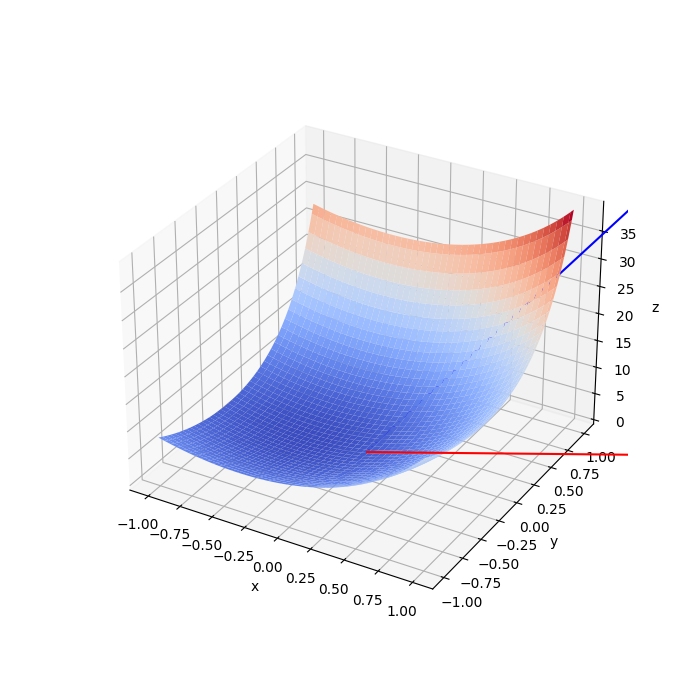

In [9]:
#Inicia el plot
N=256
arrange=[-1,1]

x_values=torch.linspace(arrange[0],arrange[1],steps=N)
y_values=torch.linspace(arrange[0],arrange[1],steps=N)

X, Y = torch.meshgrid(x_values,y_values)
Z = funcion_z(X,Y)

fig=plt.figure(figsize=(7,7))

ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

origin=[0,0,0]
ax.quiver(origin[0], origin[1], origin[2], vector_p0[:,0],vector_p0[:,1],vector_p0[:,2], color='r')
ax.quiver(origin[0], origin[1], origin[2], vector_p1[:,0],vector_p1[:,1],vector_p1[:,2], color='b')

ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=10,antialiased=True)

In [10]:
#Magnitud de los vectores:
print("La magnitud del vector P0 es: ", torch.linalg.vector_norm(vector_p0))
print("La magnitud del vector P1 es: ", torch.linalg.vector_norm(vector_p1))

La magnitud del vector P0 es:  tensor(145.3096)
La magnitud del vector P1 es:  tensor(3.9564e+09)


d) (5 puntos) $z=f\left(x,y\right)=\sin\left(x^{2}\right)+x\cos\left(y^{3}\right)$, evaluación del gradiente en los puntos $P_{0}=\left(-2,6\right)$ y $P_{1}=\left(0,4\right)$.

El vector gradiente corresponde a:

   $\frac{\delta f}{\delta x}\sin\left(x^{2}\right)+x\cos\left(y^{3}\right) \rightarrow{cos(x^{2})\cdot2x+cos(y^{3})=\mathbf{2x\cdot cos(x^{2})+cos(y^{3})}}$

   $\frac{\delta f}{\delta y}\sin\left(x^{2}\right)+x\cos\left(y^{3}\right) \rightarrow{-x\cdot sen(y^{3})\cdot3y^{2}=\mathbf{-3xy^{2}\cdot sen(y^{3})}}$

   $\mathbf{\nabla f(x,y)=2x\cdot cos(x^{2})+cos(y^{3})\hat{i}+-3xy^{2}\cdot sen(y^{3})\hat{j}}$

In [11]:
#Función multivariable original
def funcion_z(X, Y):
    return torch.sin(X**2) + (X*torch.cos(Y**3))

#Calculo del Vector Gradiente (Derivadas parciales)
def dx(X,Y):
    return 2*X*torch.cos(X**2)+torch.cos(Y**3)

def dy(X,Y):
    return -3*X*(Y**2)*torch.sin(Y**3)

def vector_gradiente(X,Y):
    return [dx(X,Y),dy(X,Y),0]

P0=torch.tensor([-2,6], dtype = torch.float)
P1=torch.tensor([0,4], dtype = torch.float)

vector_p0=torch.tensor([vector_gradiente(P0[0],P0[1])], dtype = torch.float)
vector_p1=torch.tensor([vector_gradiente(P1[0],P1[1])], dtype = torch.float)

print("El valor del vector gradiente para el punto P0=(-2, 6) es: ", vector_p0)
print("El valor del vector gradiente para el punto P1=(0, 4) es: ", vector_p1)

El valor del vector gradiente para el punto P0=(-2, 6) es:  tensor([[  1.8966, 150.3486,   0.0000]])
El valor del vector gradiente para el punto P1=(0, 4) es:  tensor([[0.3919, -0.0000, 0.0000]])


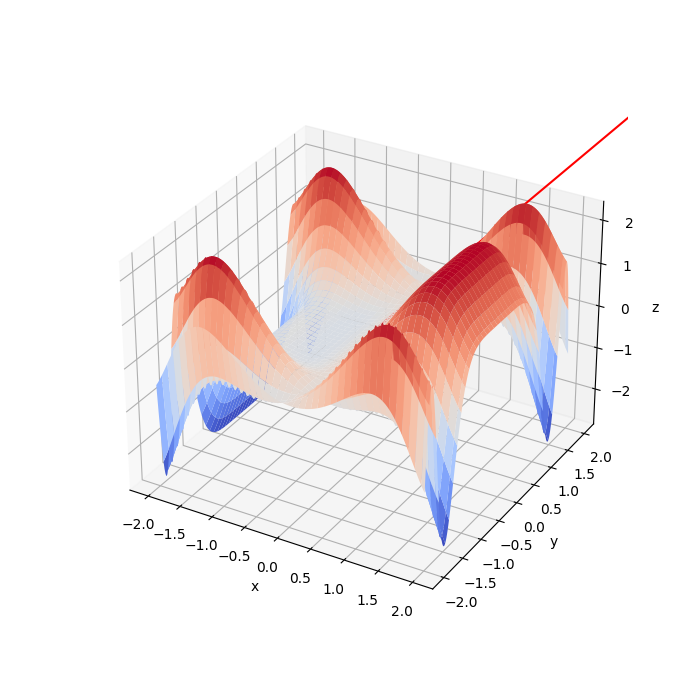

In [12]:
#Inicia el plot
N=256
arrange=[-2,2]

x_values=torch.linspace(arrange[0],arrange[1],steps=N)
y_values=torch.linspace(arrange[0],arrange[1],steps=N)

X, Y = torch.meshgrid(x_values,y_values)
Z = funcion_z(X,Y)

fig=plt.figure(figsize=(7,7))

ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

origin=[0,0,0]
ax.quiver(origin[0], origin[1], origin[2], vector_p0[:,0],vector_p0[:,1],vector_p0[:,2], color='r')
ax.quiver(origin[0], origin[1], origin[2], vector_p1[:,0],vector_p1[:,1],vector_p1[:,2], color='b')

ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=10,antialiased=True)

In [13]:
#Magnitud de los vectores:
print("La magnitud del vector P0 es: ", torch.linalg.vector_norm(vector_p0))
print("La magnitud del vector P1 es: ", torch.linalg.vector_norm(vector_p1))

La magnitud del vector P0 es:  tensor(150.3606)
La magnitud del vector P1 es:  tensor(0.3919)


2. (10 puntos) En general, investigue ¿qué es y que indica la matriz Hessiana?
    Sobre las aplicaciones de esta matriz, se pueden citar los siguientes puntos:

    * Se define como una matriz cuadrada de $nxn$ que se compone de las segundas derivada parciales de la función multivariable, por ejemplo para funciones de dos variables:
    $\mathbf{H}_{f}(x,y)=\left(\begin{array}{cc}\frac{\delta^{2}f}{\delta x^{2}} & \frac{\delta^{2}f}{\delta y\delta x}\\\frac{\delta^{2}f}{\delta y\delta x} & \frac{\delta^{2}f}{\delta y^{2}}\end{array}\right)$

    * Por Teorema de Schwarz se puede decir que $\frac{\delta^{2}f}{\delta y\delta x}=\frac{\delta^{2}f}{\delta x\delta y}$

    * Permite encontrar ya sea máximos o mínimos de funciones multivariable. Para conseguir esto, el procedimiento a seguir consiste de obtener los puntos críticos de la función (igualando a cero el vector gradiente y obteniendo los puntos respectivos del despeje) y operarlos con la matriz Hessiana.

    * Una vez obtenido el resultado, la matriz que se consiguió debe ser evaluada bajo el criterio de: definida positiva, definida negativa, indefinida, etc (lo cual puede ser establecido con el Criterio de los valores propios o con el Criterio de Sylvester).

    * Dependiendo del tipo de matriz obtenida, así podrá definirse el punto que fue utilizado para el cálculo (máximo, mínimo o un punto neutro).

    * También permite saber si una función es cóncava o convexa con respecto a un conjunto de puntos pertenecientes a la función, aplicando nuevamente el concepto de definida positiva, definida negativa, indefinida, etc.

    * Fuentes utilizadas para cálculo y usos:
        * [Matriz Hessiana (o Hessiano)](https://www.matricesydeterminantes.com/matrices/matriz-hessiana-hessiano-2x2-3x3/)
        * [La matriz hessiana](https://es.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian)

    a) Para cada una de los puntos 1.a, 1.b, 1.c, y 1.d calcule la matriz Hessiana:

    * 1.a Para $f\left(x,y\right)=\sqrt{x^{2}+y^{2}}$

        * $\frac{\delta f}{\delta x}=\frac{x}{\sqrt{x^{2}+y^{2}}}$

        * $\frac{\delta f}{\delta y}=\frac{y}{\sqrt{x^{2}+y^{2}}}$

        * $\frac{\delta^{2}f}{\delta x^{2}}=\frac{y^{2}}{\sqrt{(x^{2}+y^{2})^{3}}}$

        * $\frac{\delta^{2}f}{\delta y^{2}}=\frac{x^{2}}{\sqrt{(x^{2}+y^{2})^{3}}}$

        * $\frac{\delta^{2}f}{\delta y\delta x}=\frac{\delta^{2}f}{\delta x\delta y}=\frac{2xy^{2}-x^{3}}{(x^{2}+y^{2})\sqrt{(x^{2}+y^{2})^{3}}}$

        * $\mathbf{H}_{f}(x,y)=\left(\begin{array}{cc}\frac{\delta^{2}f}{\delta x^{2}} & \frac{\delta^{2}f}{\delta x\delta y}\\\frac{\delta^{2}f}{\delta y\delta x} & \frac{\delta^{2}f}{\delta y^{2}}\end{array}\right)=\left(\begin{array}{cc}\frac{y^{2}}{\sqrt{(x^{2}+y^{2})^{3}}} & \frac{2xy^{2}-x^{3}}{(x^{2}y^{2})\sqrt{(x^{2}+y^{2})^{3}}}\\\frac{2xy^{2}-x^{3}}{(x^{2}+y^{2})\sqrt{(x^{2}+y^{2})^{3}}} & \frac{x^{2}}{\sqrt{(x^{2}+y^{2})^{3}}}\end{array}\right)$

    * 1.b Para $z=f\left(x,y\right)=3x^{2}+2y^{4}$

        * $\frac{\delta f}{\delta x}=6x$

        * $\frac{\delta f}{\delta y}=8y^{3}$

        * $\frac{\delta^{2}f}{\delta x^{2}}=6$

        * $\frac{\delta^{2}f}{\delta y^{2}}=24y^{2}$

        * $\frac{\delta^{2}f}{\delta y\delta x}=\frac{\delta^{2}f}{\delta x\delta y}=0$

        * $\mathbf{H}_{f}(x,y)=\left(\begin{array}{cc}\frac{\delta^{2}f}{\delta x^{2}} & \frac{\delta^{2}f}{\delta x\delta y}\\\frac{\delta^{2}f}{\delta y\delta x} & \frac{\delta^{2}f}{\delta y^{2}}\end{array}\right)=\left(\begin{array}{cc}6 & 0\\0 & 24y^{2}\end{array}\right)$

    * 1.c Para $z=f\left(x,y\right)=4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1$

        * $\frac{\delta f}{\delta x}=2(4x+e^{2x}+1)$

        * $\frac{\delta f}{\delta y}=10y+3e^{3y}$

        * $\frac{\delta^{2}f}{\delta x^{2}}=4(e^{2x}+2)$

        * $\frac{\delta^{2}f}{\delta y^{2}}=9e^{3y}+10$

        * $\frac{\delta^{2}f}{\delta y\delta x}=\frac{\delta^{2}f}{\delta x\delta y}=0$

        * $\mathbf{H}_{f}(x,y)=\left(\begin{array}{cc}\frac{\delta^{2}f}{\delta x^{2}} & \frac{\delta^{2}f}{\delta x\delta y}\\\frac{\delta^{2}f}{\delta y\delta x} & \frac{\delta^{2}f}{\delta y^{2}}\end{array}\right)=\left(\begin{array}{cc}4(e^{2x}+2) & 0\\0 & 9e^{3y}+10\end{array}\right)$

    * 1.b Para $z=f\left(x,y\right)=\sin\left(x^{2}\right)+x\cos\left(y^{3}\right)$

        * $\frac{\delta f}{\delta x}=2x\cdot cos(x^{2})+cos(y^{3})$

        * $ \frac{\delta f}{\delta y}=-3xy^{2}\cdot sen(y^{3})$

        * $ \frac{\delta^{2}f}{\delta x^{2}}=2cos(x^{2})-2x^{2}sen(x^{2})$

        * $ \frac{\delta^{2}f}{\delta y^{2}}=-3xy(2sen(y^{3})+3y^{3}cos(y^{3}))$

        * $ \frac{\delta^{2}f}{\delta y\delta x}=\frac{\delta^{2}f}{\delta x\delta y}=-3y^{2}sen(y^{3})$

        * $\mathbf{H}_{f}(x,y)=\left(\begin{array}{cc}\frac{\delta^{2}f}{\delta x^{2}} & \frac{\delta^{2}f}{\delta x\delta y}\\\frac{\delta^{2}f}{\delta y\delta x} & \frac{\delta^{2}f}{\delta y^{2}}\end{array}\right)=\left(\begin{array}{cc}2cos(x^{2})-2x^{2}sen(x^{2}) & -3y^{2}sen(y^{3})\\-3y^{2}sen(y^{3}) & -3xy(2sen(y^{3})+3y^{3}cos(y^{3}))\end{array}\right)$